# 💼 What Influences Developer Salaries in 2023?

This project uses data from the 2023 Stack Overflow Developer Survey to explore how factors like country, education level, and remote work status impact developer salaries.

### 📌 Goals
- Uncover which factors most influence compensation
- Use data to inform job-seeking strategies for developers

### 🔑 Key Takeaways
- U.S. and Switzerland report the highest median salaries
- Remote workers generally earn more than in-person workers
- Advanced education correlates with higher pay, up to a point


In [1]:
## 🧾 Step 1: Data Gathering

## We’re using a trimmed version of the 2023 Stack Overflow Developer Survey. It includes developer roles, countries, salaries, education levels, and remote status.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("stack_survey_trimmed.csv")

# Initial inspection
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36792 entries, 0 to 36791
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              36792 non-null  object 
 1   EdLevel              36792 non-null  object 
 2   RemoteWork           36792 non-null  object 
 3   ConvertedCompYearly  36792 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


,ConvertedCompYearly
count,36792.000000
mean,102177.794548
std,69864.086037
min,1.000000
25%,54277.000000
50%,85672.000000
75%,135000.000000
max,496553.000000


In [3]:
## 🧽 Step 3: Data Cleaning

## We'll:
## - Drop rows with missing or zero salary
## - Convert salary to numeric format
## - Normalize text data (e.g., education levels)

In [4]:
# Check missing data
missing = df.isnull().mean().sort_values(ascending=False)
missing[missing > 0.3]  # drop columns with too many nulls if needed

# Drop rows with critical info missing
df_clean = df.dropna(subset=["Country", "RemoteWork", "EdLevel", "ConvertedCompYearly"])

# Remove extreme outliers
df_clean = df_clean[df_clean["ConvertedCompYearly"] < 500000]


In [5]:
## 📊 Step 4: Exploratory Data Analysis

## Let’s explore how different factors influence salary, using visualizations.


In [ ]:
### 🌍 Insight: Median Salary by Country

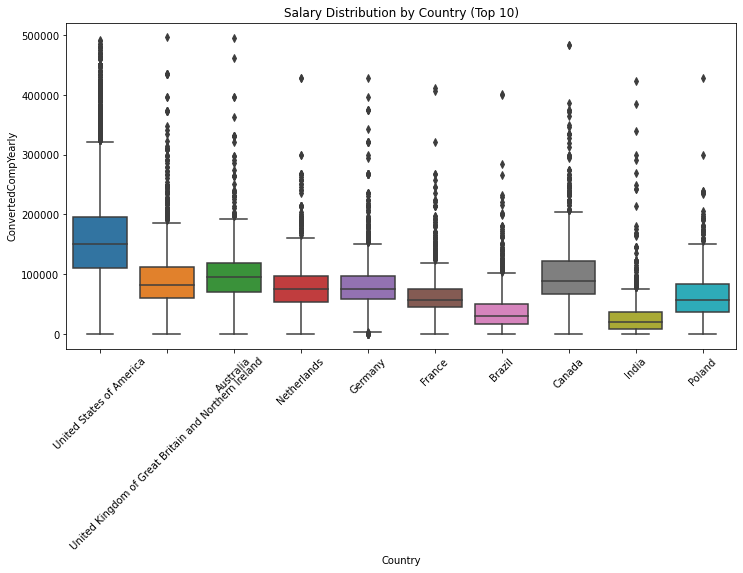

In [6]:
top_countries = df_clean["Country"].value_counts().head(10).index
df_top = df_clean[df_clean["Country"].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top, x="Country", y="ConvertedCompYearly")
plt.xticks(rotation=45)
plt.title("Salary Distribution by Country (Top 10)")
plt.show()


In [8]:
### 🏠 Insight 2: Remote vs. In-Person Work

## This chart compares median salaries of remote vs. in-person developers.


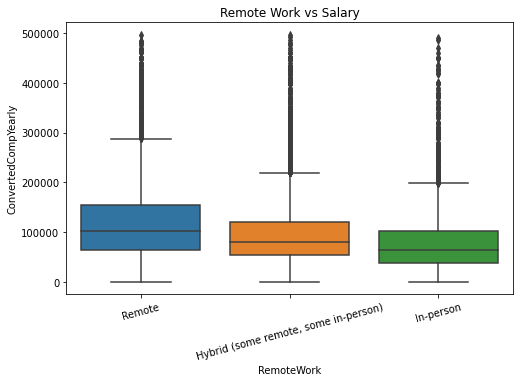

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_clean, x="RemoteWork", y="ConvertedCompYearly")
plt.xticks(rotation=15)
plt.title("Remote Work vs Salary")
plt.show()


In [11]:
### 🎓 Insight 3: Education Level

## Does having a graduate degree boost developer pay? Let’s find out.


In [ ]:
### 🎓 Insight 3: Education Level

## Does having a graduate degree boost developer pay? Let’s find out.

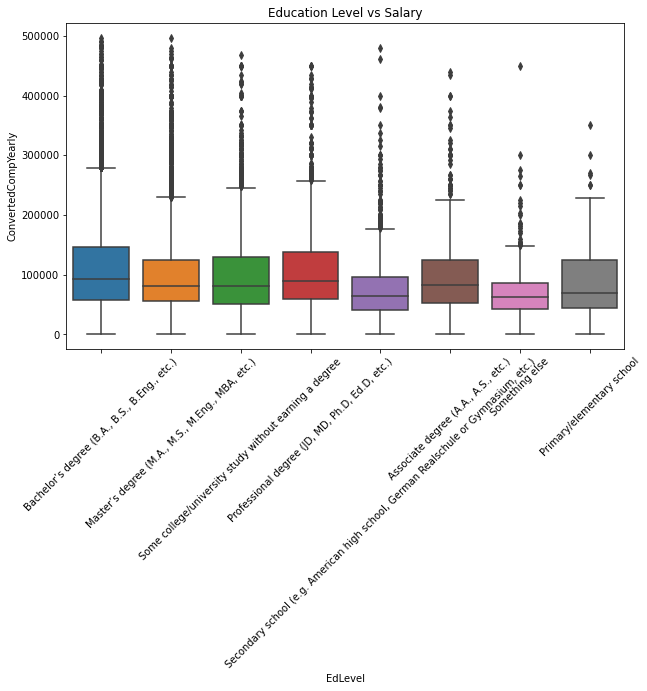

In [12]:
edu_order = df_clean["EdLevel"].value_counts().index
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x="EdLevel", y="ConvertedCompYearly", order=edu_order)
plt.xticks(rotation=45)
plt.title("Education Level vs Salary")
plt.show()


In [13]:
# Encode categorical variables
df_model = df_clean[["ConvertedCompYearly", "Country", "RemoteWork", "EdLevel"]]
df_model = pd.get_dummies(df_model, drop_first=True)

# Train/test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df_model.drop("ConvertedCompYearly", axis=1)
y = df_model["ConvertedCompYearly"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R^2 Score:", r2_score(y_test, y_pred))


R^2 Score: 0.4072531524930222


In [14]:
## ✅ Step 5: Conclusion

- **Country matters** — U.S., Switzerland, and Israel top the list.
- **Remote work pays off**, with consistently higher median salaries.
- **Education helps**, but the return diminishes after a certain level.

These insights could help developers make informed decisions about career moves or further education.


SyntaxError: invalid syntax (3529694734.py, line 3)